# Kings County Housing Prices Bakeoff

Below are a list of steps that you should take while trying to complete your bake-off entry.

## Step 1: Read in Data

In [24]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
%matplotlib inline

pd.set_option('display.max_columns', 100)

In [4]:
df = pd.read_csv('kc_house_data_train.csv')

In [5]:
df.shape

(17290, 22)

In [1]:
# df.describe()

In [7]:
# df.info()

In [8]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Step 2: Exploratory Data Analysis 
    
Become familiar with the data.  Look to see if there are any extreme values.  

Additionally create data visualizations to determine if there are any relationships between your features and your target variables.  

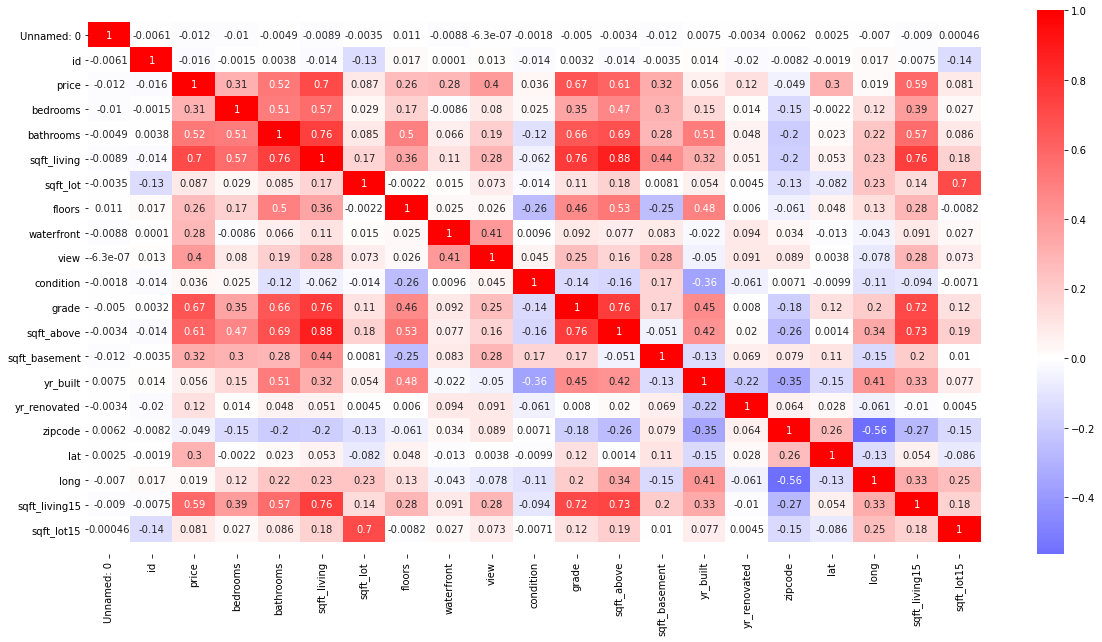

In [10]:
fig, ax = plt.subplots(figsize=(20,10)) # figsize to make larger
sns.heatmap(df.corr(), cmap='bwr', center=0, annot=True)
# OPTIONAL: fix for matplotlib bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() 

In [34]:
df.loc[(df['price'] > 5000000)]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1979,1979,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
2232,2232,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
5039,5039,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
6903,6903,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
7519,7519,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
10366,10366,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
14668,14668,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788


In [39]:
above_5std = df.price.mean()+(5*df.price.std())

In [40]:
df[(df['price'])<= above_5std]

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17285,17285,627300195,20150303T000000,750000.0,5,2.50,3240,9960,1.0,0,1,3,8,2020,1220,1958,0,98008,47.5858,-122.112,2730,10400
17286,17286,8819900270,20140520T000000,440000.0,2,1.75,1300,4000,2.0,0,0,3,7,1300,0,1948,0,98105,47.6687,-122.288,1350,4013
17287,17287,3816300095,20140514T000000,310000.0,3,1.00,1050,9876,1.0,0,0,3,7,1050,0,1953,0,98028,47.7635,-122.262,1760,9403
17288,17288,122069107,20141204T000000,427500.0,3,1.50,1900,43186,1.5,0,0,4,7,1300,600,1971,0,98038,47.4199,-121.990,2080,108028


<ipython-input-25-766cacf648ac>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
<ipython-input-25-766cacf648ac>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
<ipython-input-25-766cacf648ac>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
<ipython-input-25-766cacf648ac>:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
<ipython-input-25-766cacf648ac>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
<ipython-input-25-766cacf648ac>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2][1].set_yticklabels(df['sqft

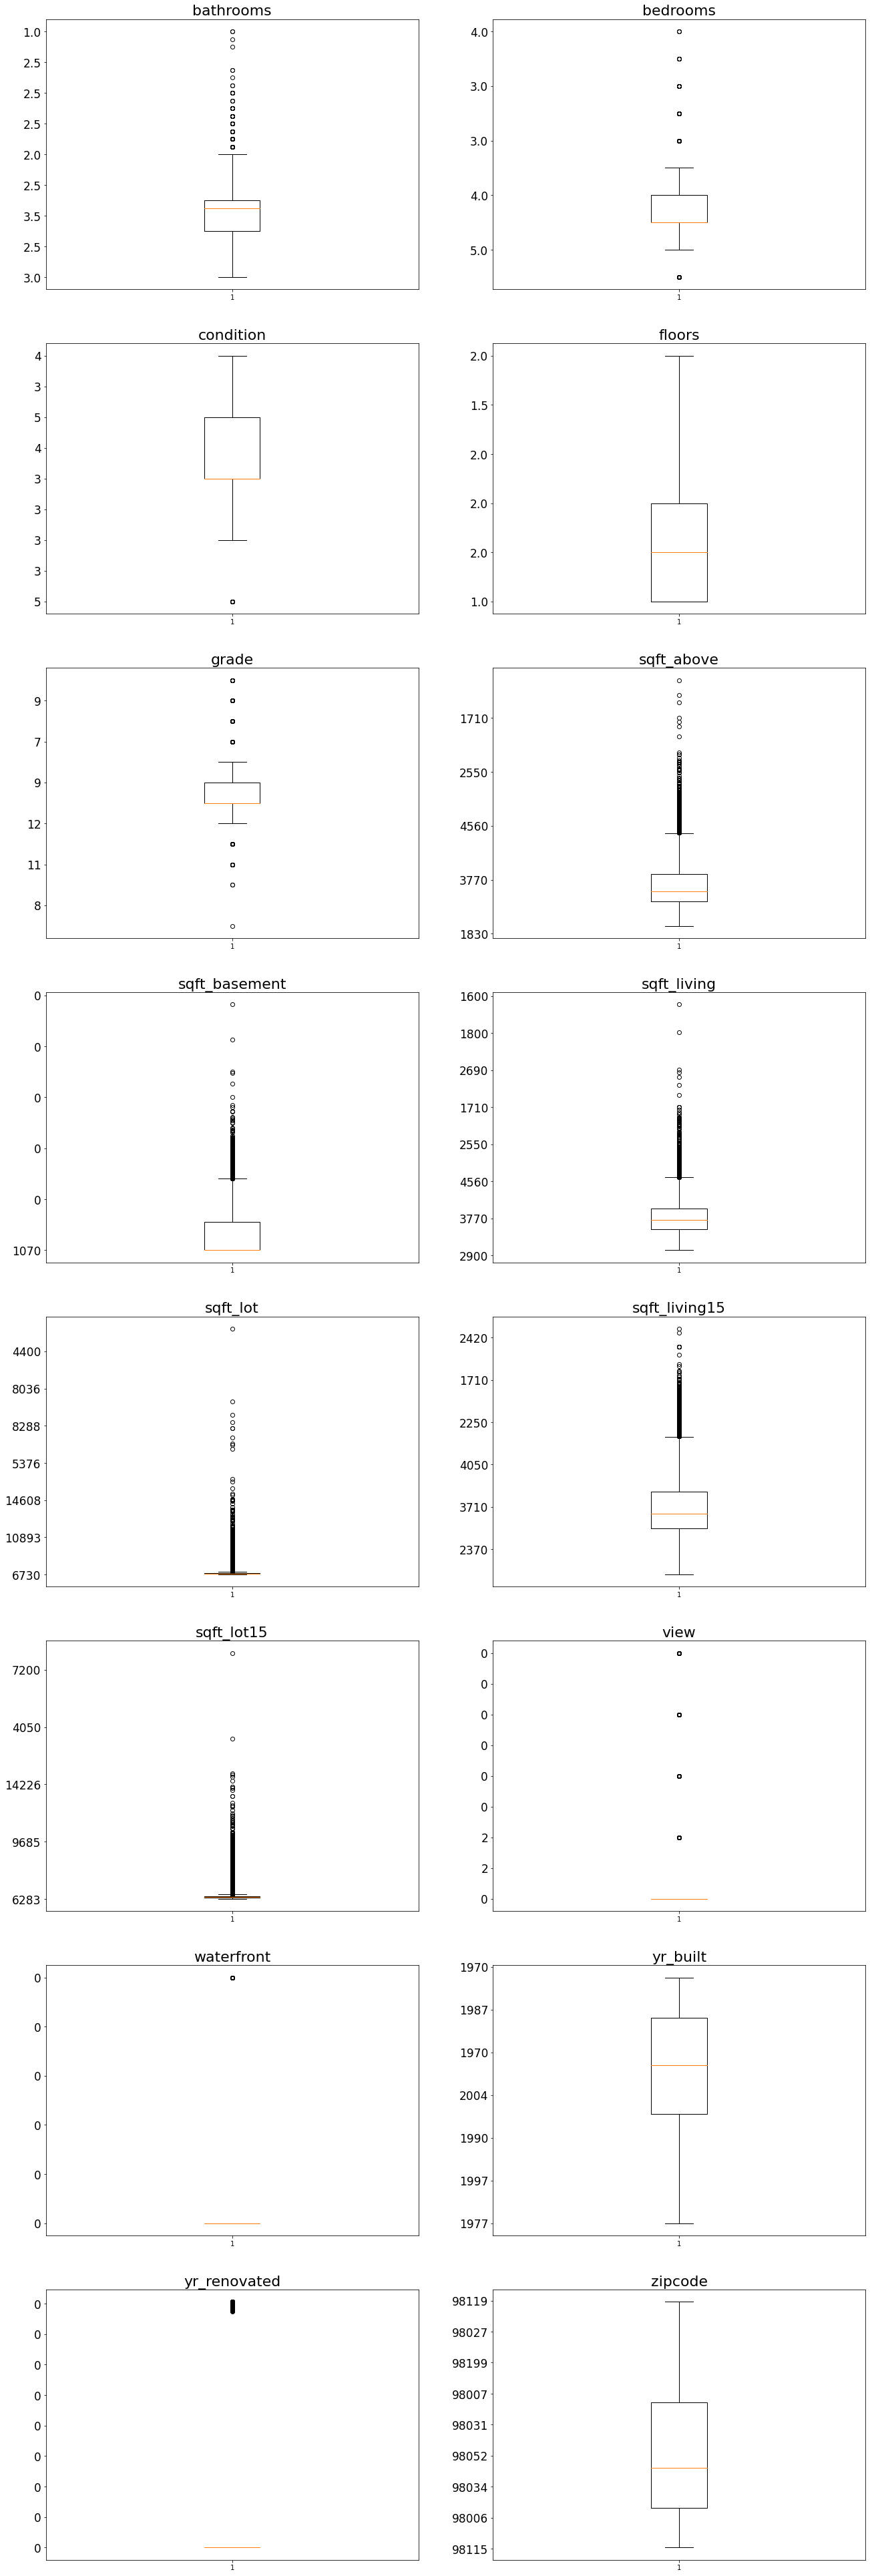

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

fig , axes = plt.subplots(8,2, figsize = (22,70))

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

axes[0][0].boxplot(df['bathrooms'])
axes[0][0].set_yticklabels(df['bathrooms'], fontsize = 17)
axes[0][1].boxplot(df['bedrooms'])
axes[0][1].set_yticklabels(df['bedrooms'], fontsize = 17)
axes[1][0].boxplot(df['condition'])
axes[1][0].set_yticklabels(df['condition'], fontsize = 17)
axes[1][1].boxplot(df['floors'])
axes[1][1].set_yticklabels(df['floors'], fontsize = 17)
axes[2][0].boxplot(df['grade'])
axes[2][0].set_yticklabels(df['grade'], fontsize = 17)
axes[2][1].boxplot(df['sqft_above'])
axes[2][1].set_yticklabels(df['sqft_above'], fontsize = 17)
axes[3][0].boxplot(df['sqft_basement'])
axes[3][0].set_yticklabels(df['sqft_basement'], fontsize = 17)
axes[3][1].boxplot(df['sqft_living'])
axes[3][1].set_yticklabels(df['sqft_living'], fontsize = 17)
axes[4][0].boxplot(df['sqft_lot'])
axes[4][0].set_yticklabels(df['sqft_lot'], fontsize = 17)
axes[4][1].boxplot(df['sqft_living15'])
axes[4][1].set_yticklabels(df['sqft_living15'], fontsize = 17)
axes[5][0].boxplot(df['sqft_lot15'])
axes[5][0].set_yticklabels(df['sqft_lot15'], fontsize = 17)
axes[5][1].boxplot(df['view'])
axes[5][1].set_yticklabels(df['view'], fontsize = 17)
axes[6][0].boxplot(df['waterfront'])
axes[6][0].set_yticklabels(df['waterfront'], fontsize = 17)
axes[6][1].boxplot(df['yr_built'])
axes[6][1].set_yticklabels(df['yr_built'], fontsize = 17)
axes[7][0].boxplot(df['yr_renovated'])
axes[7][0].set_yticklabels(df['yr_renovated'], fontsize = 17)
axes[7][1].boxplot(df['zipcode'])
axes[7][1].set_yticklabels(df['zipcode'], fontsize = 17)
                      
plt.subplots_adjust(hspace = .2)

In [ ]:
#save to seperate csv

Text(0.5, 1.0, 'zipcode')

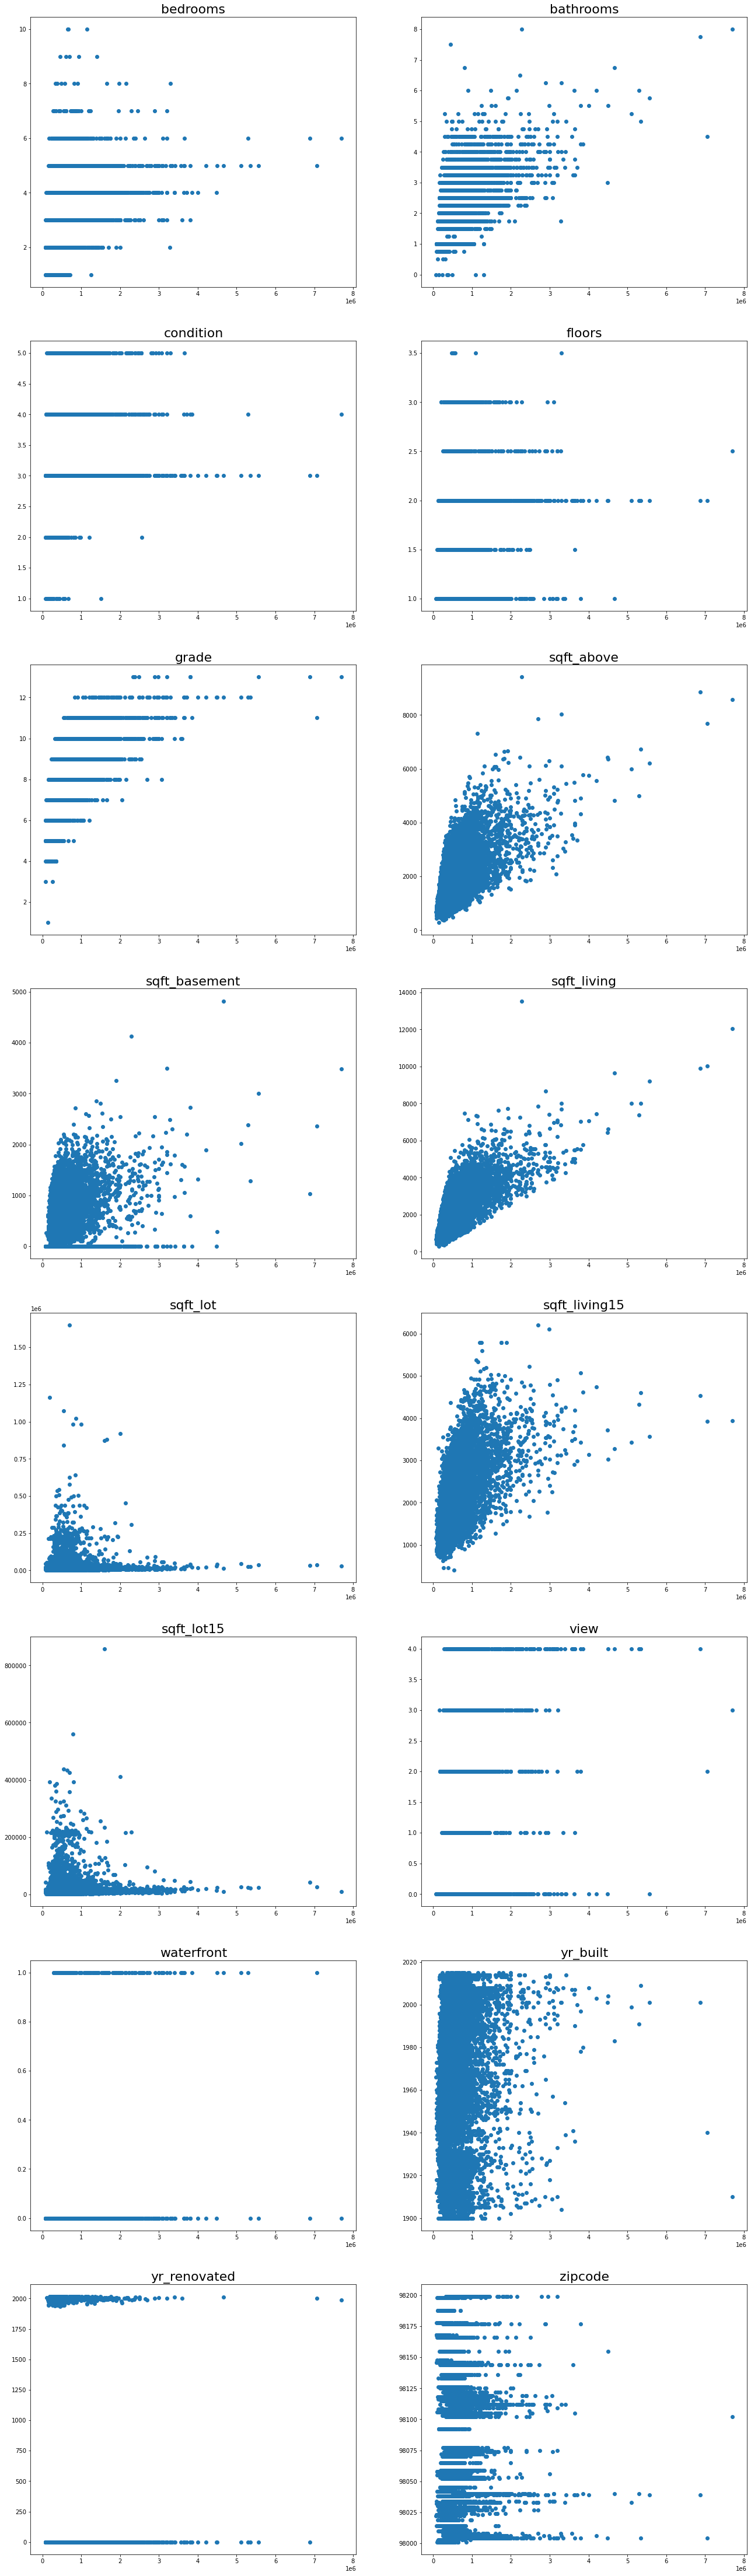

In [17]:
fig , axes = plt.subplots(8,2, figsize = (22,80))

axes[0][0].scatter(df['price'], df['bathrooms'])
axes[0][1].scatter(df['price'], df['bedrooms'])
axes[1][0].scatter(df['price'], df['condition'])
axes[1][1].scatter(df['price'], df['floors'])
axes[2][0].scatter(df['price'], df['grade'])
axes[2][1].scatter(df['price'], df['sqft_above'])
axes[3][0].scatter(df['price'], df['sqft_basement'])
axes[3][1].scatter(df['price'], df['sqft_living'])
axes[4][0].scatter(df['price'], df['sqft_lot'])
axes[4][1].scatter(df['price'], df['sqft_living15'])
axes[5][0].scatter(df['price'], df['sqft_lot15'])
axes[5][1].scatter(df['price'], df['view'])
axes[6][0].scatter(df['price'], df['waterfront'])
axes[6][1].scatter(df['price'], df['yr_built'])
axes[7][0].scatter(df['price'], df['yr_renovated'])
axes[7][1].scatter(df['price'], df['zipcode'])
                      
plt.subplots_adjust(hspace = .2)

axes[0][0].set_title('bathrooms', fontsize = 22)
axes[0][1].set_title('bedrooms', fontsize = 22)
axes[1][0].set_title('condition', fontsize = 22)
axes[1][1].set_title('floors', fontsize = 22)
axes[2][0].set_title('grade', fontsize = 22)
axes[2][1].set_title('sqft_above', fontsize = 22)
axes[3][0].set_title('sqft_basement', fontsize = 22)
axes[3][1].set_title('sqft_living', fontsize = 22)
axes[4][0].set_title('sqft_lot', fontsize = 22)
axes[4][1].set_title('sqft_living15', fontsize = 22)
axes[5][0].set_title('sqft_lot15', fontsize = 22)
axes[5][1].set_title('view', fontsize = 22)
axes[6][0].set_title('waterfront', fontsize = 22)
axes[6][1].set_title('yr_built', fontsize = 22)
axes[7][0].set_title('yr_renovated', fontsize = 22)
axes[7][1].set_title('zipcode', fontsize = 22)

In [16]:
df['bedrooms'] = df['bedrooms'].replace([0,33,11],[df['bedrooms'].median(),3, 4])
df['bedrooms']

0        4.0
1        5.0
2        4.0
3        3.0
4        3.0
        ... 
17285    5.0
17286    2.0
17287    3.0
17288    3.0
17289    3.0
Name: bedrooms, Length: 17290, dtype: float64

## Step 3: Clean up any issues (extreme values, etc.) with the data.  

Remember that you can't just delete rows with extreme values. Similar observations might be present in the holdout data set, and you can't just delete those rows and not have a prediction for it. 

In [43]:
above_5std = df.price.mean()+(5*df.price.std())

In [44]:
df['price'] = df[(df['price'])<= above_5std]
df['price']

0            0
1            1
2            2
3            3
4            4
         ...  
17285    17285
17286    17286
17287    17287
17288    17288
17289    17289
Name: price, Length: 17290, dtype: object

## Step 4: Generate new features that you think could be important.

After doing this, you will want to go back to steps 2 and 3 to investigate these new features.

In [20]:
model = ols(formula='price~sqft_living+sqft_lot+sqft_living15+sqft_lot15', data=df).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     4400.
Date:                Tue, 01 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:02:04   Log-Likelihood:            -2.4030e+05
No. Observations:               17290   AIC:                         4.806e+05
Df Residuals:                   17285   BIC:                         4.806e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.109e+05   6141.937    -18.051      0.000   -1.23e+05   -9.88e+04
sqft_living     248.7633      3.330     74.714      0.000     242.237     255.290
sqft_lot          0.0543      0.066      0.816      0.414      -0.076       0.185
sqft_living15    71.9144      4.465     16.105      0.000      63.162      80.667
sqft_lot15       -0.7751      0.104     -7.469      0.000      -0.979      -0.572
==============================================================================
Omnibus:                    12993.273   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           642890.079
Skew:                           3.138   Prob(JB):                         0.00
Kurtosis:                      32.206   Cond. No.                     1.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1) Identify a categorical variable in the data set and create dummy columns.

In [34]:
pd.get_dummies(df['condition'])
pd.get_dummies(df['grade'])
pd.get_dummies(df['waterfront'])
pd.get_dummies(df['view'])
df_dummy = pd.get_dummies(df, columns=['condition'], drop_first=True)

### 4.2) There is a column that gives the date for when the house was sold, how could this be useful in your model? How might you transform the current column to a more useful feature?

In [ ]:
#your code here

### 4.3) There are columns for when the house was built and when it was renovated.  How could you use these columns to create a new column?

In [ ]:
#your code here 

### <ins>Non-linear transformations</ins>

### 4.4) Create a polynomial feature for two of your continuous variables.

In [ ]:
# your code here

### 4.5) Create an interaction feature between a binary variable (dummy variable) and a continuous variable.

In [ ]:
# your code here

## Step 5: Train-Test Split

If you plan on doing any scaling of your data, make sure it is done at the appropriate time. 

### 5.1) Perform a train-test split of the data.

In [1]:
#your code here 

### 5.2) Fit your scaler to training the data.

In [2]:
#your code here 

### 5.3) Transform the testing set with the scaler.

In [3]:
#your code here 

### 5.4) Fit the model to the training data.

In [4]:
#your code here 

### 5.5) Use the model to predict on the training set and the test set.

In [5]:
#your code here 

### 5.6) Evaluate the training and test predictions using RMSE.

In [6]:
#your code here 

### 5.7) Determine if your model is overfit.

In [ ]:
#your code here 

## Step 6: Utilize some different feature selection techniques before or in conjuction with fitting your models.

### 6.1) Utilize a filter method to identify some features to remove from the model.  

In [7]:
# your code here

### 6.2) After removing the features, re-run Step 5 and see if your new model performs better than the old model.

In [8]:
# your code here

## Step 7: Evaluate your different models in order to determine the best model overall.

## Step 8:  Refit your best model to the entire dataset.

## Step 9: Save your final model using pickle.

https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/